# Part 1

In [68]:
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [70]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [152]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

5.6554166816e+13
-5.6554166816e+13

22446749330.0
-22446749330.0


## Q1

In [71]:
l2_small_penalty = 1.5e-5

poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])
print model.coef_[0]

124.873306481


## Q2

In [72]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [73]:
l2_small_penalty = 1e-9

In [74]:
data_1 = polynomial_dataframe(set_1['sqft_living'], 15)
model_1 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_1.fit(data_1, set_1['price'])

data_2 = polynomial_dataframe(set_2['sqft_living'], 15)
model_2 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_2.fit(data_2, set_2['price'])

data_3 = polynomial_dataframe(set_3['sqft_living'], 15)
model_3 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_3.fit(data_3, set_3['price'])

data_4 = polynomial_dataframe(set_4['sqft_living'], 15)
model_4 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_4.fit(data_4, set_4['price'])

print str(model_1.coef_[0]) + ' ' + str(model_2.coef_[0]) + ' ' + str(model_3.coef_[0]) + ' ' + str(model_4.coef_[0])

544.669390621 859.362646805 -755.395862301 1119.44575768


In [75]:
l2_large_penalty = 1.23e2

In [76]:
data_1 = polynomial_dataframe(set_1['sqft_living'], 15)
model_1 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_1.fit(data_1, set_1['price'])

data_2 = polynomial_dataframe(set_2['sqft_living'], 15)
model_2 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_2.fit(data_2, set_2['price'])

data_3 = polynomial_dataframe(set_3['sqft_living'], 15)
model_3 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_3.fit(data_3, set_3['price'])

data_4 = polynomial_dataframe(set_4['sqft_living'], 15)
model_4 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model_4.fit(data_4, set_4['price'])

print str(model_1.coef_[0]) + ' ' + str(model_2.coef_[0]) + ' ' + str(model_3.coef_[0]) + ' ' + str(model_4.coef_[0])

2.32806802958 2.09756902778 2.28906258119 2.08596194092


## Q3

In [77]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [78]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [79]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    error = 0.
    for i in range(k):
        start = (n*i)/k
        end = (n*(i+1))/k
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(data[0:start].append(data[end:n]), output[0:start].append(output[end:n]))
        error = error + np.sum((model.predict(data[start:end]) - output[start:end])**2)
    return error/k

In [80]:
poly15_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
poly15_output = train_valid_shuffled['price']

In [81]:
l2_penalty = np.logspace(3, 9, num=13)
k = 10

In [82]:
error = []
for i in range(len(l2_penalty)):
    error.append(k_fold_cross_validation(k, l2_penalty[i], poly15_data, poly15_output))
print error
best_l2_penalty = l2_penalty[error.index(min(error))]
print best_l2_penalty

[264977361036975.9, 265692935858318.25, 265924368957215.75, 265998081509342.84, 266021444553980.56, 266028837918724.4, 266031176438468.1, 266031915996607.25, 266032149870752.6, 266032223828783.7, 266032247216419.94, 266032254612245.0, 266032256951011.16]
1000.0


## Q4

In [83]:
train = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
train.sort(['sqft_living', 'price'])
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
test.sort(['sqft_living', 'price'])

train_data = polynomial_dataframe(train['sqft_living'], 15)
model = linear_model.Ridge(alpha=best_l2_penalty, normalize=True)
model.fit(train_data, train['price'])

test_data = polynomial_dataframe(test['sqft_living'], 15)
print np.sum((model.predict(test_data) - test['price'])**2)

2.83756877068e+14


/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/home/jue/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


#  

# Part 2

In [187]:
def get_numpy_data(data, features, output):
    data['constant'] = 1
    features = ['constant'] + features
    output_np = data[output]
    output_np = output_np.as_matrix()
    data_np = data.as_matrix(features)
    return (data_np, output_np)

In [188]:
def predict_output(data_np, weights):
    predictions = np.dot(data_np, weights)
    return predictions

In [189]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    derivative = (-2.)*np.dot(errors, feature)
    if not feature_is_constant:
        derivative = derivative + 2.*l2_penalty*weight
    return derivative

In [190]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0
    #while not reached maximum number of iterations:
    # compute the predictions using your predict_output() function
    while iteration < max_iterations:
        predictions = predict_output(feature_matrix, weights)
        errors = output - predictions
        sum_of_gradient_mag = 0.
        # compute the errors as predictions - output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            gradient = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, i == 0)
            weights[i] = weights[i] - step_size * gradient
            sum_of_gradient_mag = sum_of_gradient_mag + gradient**2
            # subtract the step size times the derivative from the current weight  
            
        iteration = iteration + 1
    
    return weights

In [191]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

5.6554166816e+13
-5.6554166816e+13

22446749330.0
-22446749330.0


## Q1

In [201]:
train_data = pd.read_csv('data/kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('data/kc_house_test_data.csv', dtype=dtype_dict)

In [202]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [203]:
step_size = 1e-12
max_iterations = 1000
l2_penalty = 0.
initial_weights = [0., 0.]

In [204]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [205]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

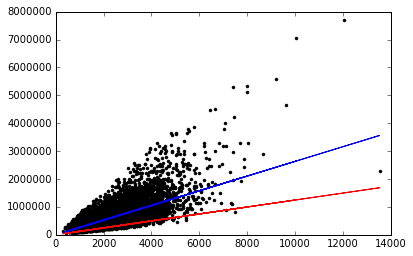

In [206]:
plt.plot(simple_feature_matrix[:, 1],output,'k.',
        simple_feature_matrix[:, 1],predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix[:, 1],predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [207]:
print str(simple_weights_0_penalty) + ' ' + str(simple_weights_high_penalty)

[ -1.63113515e-01   2.63024369e+02] [   9.76730382  124.57217567]


## Q2

In [208]:
print 'initial_weight TEST RSS = ' + str(np.sum((predict_output(simple_test_feature_matrix, initial_weights) - test_output)**2))
print 'no regularization TEST RSS = ' + str(np.sum((predict_output(simple_test_feature_matrix, simple_weights_0_penalty) - test_output)**2))
print 'L2 regularization TEST RSS = ' + str(np.sum((predict_output(simple_test_feature_matrix, simple_weights_high_penalty) - test_output)**2))

initial_weight TEST RSS = 1.78427328614e+15
no regularization TEST RSS = 2.75723632154e+14
L2 regularization TEST RSS = 6.9464210149e+14


## Q3

In [209]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [210]:
initial_weights = [0., 0., 0.]
step_size = 1e-12
max_iterations = 1000
l2_penalty = 0.

multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations )

In [211]:
l2_penalty = 1e11

multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations )

In [212]:
print str(multiple_weights_0_penalty[1]) + ' ' + str(multiple_weights_high_penalty[1])

243.054169821 91.4892736471


## Q4

In [213]:
print 'initial_weight TEST RSS = ' + str(np.sum((predict_output(test_feature_matrix, initial_weights) - test_output)**2))
print 'no regularization TEST RSS = ' + str(np.sum((predict_output(test_feature_matrix, multiple_weights_0_penalty) - test_output)**2))
print 'L2 regularization TEST RSS = ' + str(np.sum((predict_output(test_feature_matrix, multiple_weights_high_penalty) - test_output)**2))

initial_weight TEST RSS = 1.78427328614e+15
no regularization TEST RSS = 2.74067615919e+14
L2 regularization TEST RSS = 5.00404800501e+14


## Q5

In [214]:
predicted_price_no_reg = predict_output(test_feature_matrix[0], multiple_weights_0_penalty)
predicted_price_high_reg = predict_output(test_feature_matrix[0], multiple_weights_high_penalty)

In [215]:
print 'error of model with no regularization = ' + str(test_output[0] - predicted_price_no_reg)
print 'error of model with high regularization = ' + str(test_output[0] - predicted_price_high_reg)

error of model with no regularization = -77465.4760582
error of model with high regularization = 39546.4696781
